<a href="https://colab.research.google.com/github/shaikraza02/E-Commerce_DataAnalysis/blob/main/data_analysis_e_commerce_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
order_data = pd.read_csv('/content/olist_orders_dataset.csv')
order_item_data = pd.read_csv('/content/olist_order_items_dataset.csv')
products_data = pd.read_csv('/content/olist_products_dataset.csv')
customers_data = pd.read_csv('/content/olist_customers_dataset.csv')
sellers_data = pd.read_csv('/content/olist_sellers_dataset.csv')
reviews_data = pd.read_csv('/content/olist_order_reviews_dataset.csv')
product_category_data = pd.read_csv('/content/product_category_name_translation.csv')
location_data = pd.read_csv('/content/olist_geolocation_dataset.csv')
payment_data = pd.read_csv('/content/olist_order_payments_dataset.csv')

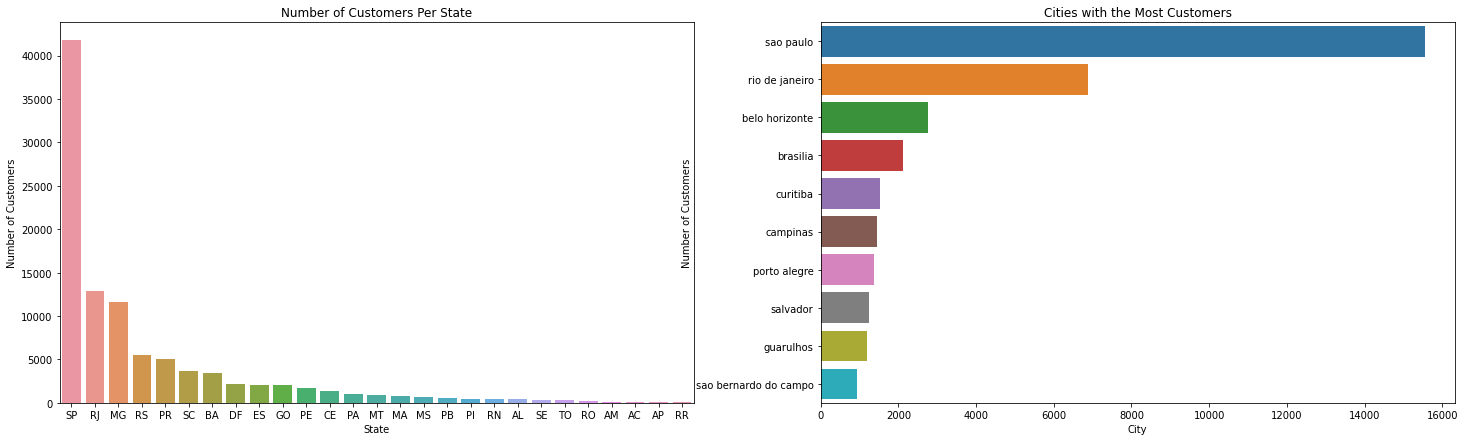

In [ ]:
#Customer' trend by state and city (Top states and cities with most number of customers)
state_df = customers_data.groupby('customer_state').count()['customer_id'].reset_index()
city_df = customers_data.groupby('customer_city').count()['customer_id'].reset_index()

plt.figure(figsize = (25,7))

plt.subplot(121)


sns.barplot(data = state_df.sort_values('customer_id', ascending = False), x = 'customer_state', y = 'customer_id')
plt.title('Number of Customers Per State')
plt.xlabel('State')
plt.ylabel('Number of Customers')

plt.subplot(122)


sns.barplot(data = city_df.sort_values('customer_id', ascending = False).nlargest(10,'customer_id'), x = 'customer_id', y = 'customer_city')
plt.title('Cities with the Most Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers');

**From the above two plots we get a better understanding of the geographical distribution of the customers**

In [ ]:
#Merge the order item data with product data on product_id
product_order = pd.merge(order_item_data,products_data)
product_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    112650 non-null  object 
 1   order_item_id               112650 non-null  int64  
 2   product_id                  112650 non-null  object 
 3   seller_id                   112650 non-null  object 
 4   shipping_limit_date         112650 non-null  object 
 5   price                       112650 non-null  float64
 6   freight_value               112650 non-null  float64
 7   product_category_name       111047 non-null  object 
 8   product_name_lenght         111047 non-null  float64
 9   product_description_lenght  111047 non-null  float64
 10  product_photos_qty          111047 non-null  float64
 11  product_weight_g            112632 non-null  float64
 12  product_length_cm           112632 non-null  float64
 13  product_height

In [ ]:
product_order

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


Text(0, 0.5, 'Category')

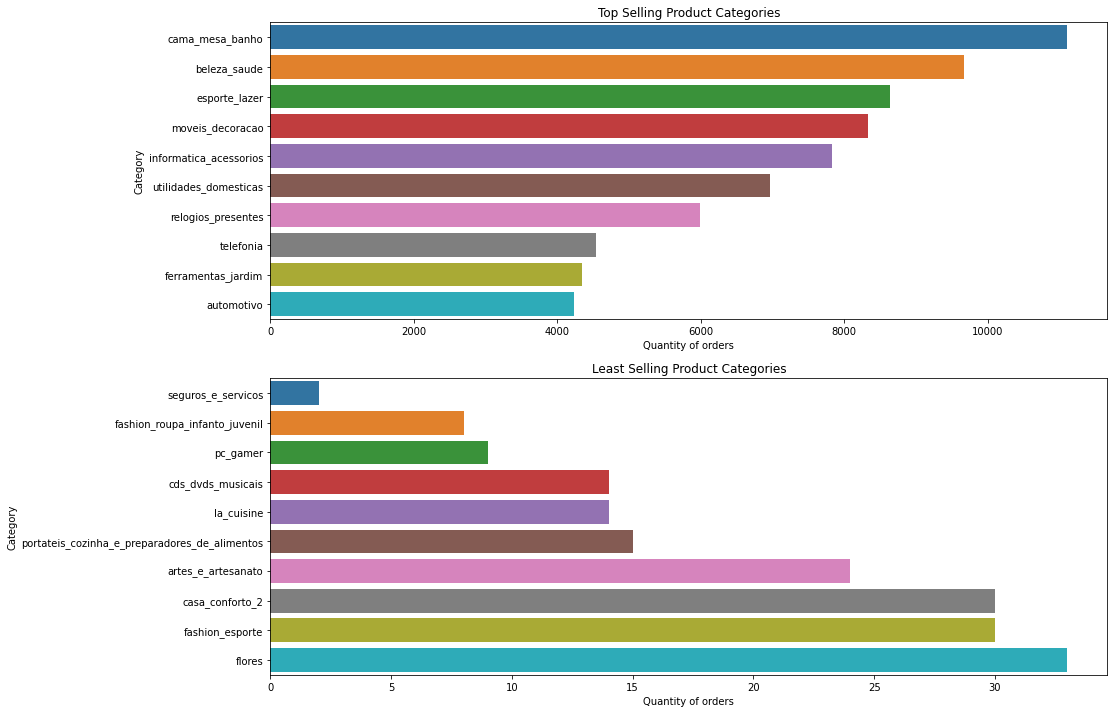

In [ ]:
#Analysis of Product Categories (Top selling categories, lowest selling categories)

top_products = product_order['product_category_name'].value_counts().reset_index().nlargest(10,'product_category_name')
lowest_products = product_order['product_category_name'].value_counts().reset_index().nsmallest(10,'product_category_name')

plt.figure(figsize = (15,12))

plt.subplot(211)
sns.barplot(data = top_products, x = 'product_category_name', y = 'index')
plt.title('Top Selling Product Categories')
plt.xlabel('Quantity of orders')
plt.ylabel('Category')

plt.subplot(212)
sns.barplot(data = lowest_products, x = 'product_category_name', y = 'index')
plt.title('Least Selling Product Categories')
plt.xlabel('Quantity of orders')
plt.ylabel('Category')

**These plots give a description of the different product categories and corresponding number of orders per category.**
* **Top selling product categories include - cama_mesa_banho, beleza_saude, esporte_lazer, moveis_decoracao etc.**
* **Lowest selling product categories include - seguros_e_servicos, pc_gamer, cds_dvds etc.**

In [ ]:
#Analysis of Individual Products (Top selling products, lowest selling products)
total_orders = pd.merge(order_data, order_item_data)
total_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [ ]:
total_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [ ]:
len(product_order['product_id'].unique())

32951

In [ ]:
#display last 8 characters of product_id
len(product_order['product_id'].str[-8:].unique())

32951

In [ ]:
product_order['prod_id']=product_order['product_id'].str[-8:]

Text(0, 0.5, 'Product_ID')

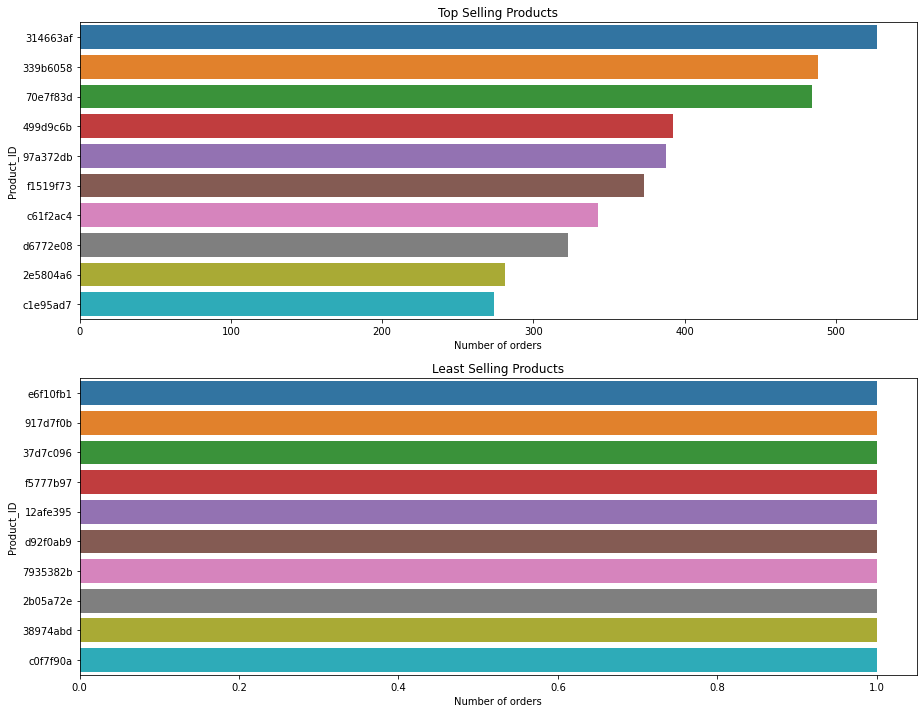

In [ ]:
#Analyzing the trend of products 
top_products_1 = product_order['prod_id'].value_counts().reset_index().nlargest(10,'prod_id')
lowest_products_1 = product_order['prod_id'].value_counts().reset_index().nsmallest(10,'prod_id')

plt.figure(figsize = (15,12))

plt.subplot(211)
sns.barplot(data = top_products_1, x = 'prod_id', y = 'index')
plt.title('Top Selling Products')
plt.xlabel('Number of orders')
plt.ylabel('Product_ID')

plt.subplot(212)
sns.barplot(data = lowest_products_1, x = 'prod_id', y = 'index')
plt.title('Least Selling Products')
plt.xlabel('Number of orders')
plt.ylabel('Product_ID')

**These plots give a description of the different products and corresponding number of orders per product.**

In [ ]:
#Order Rating (Review_score) Analysis
review_product = pd.merge(product_order,reviews_data)
review_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112372 entries, 0 to 112371
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    112372 non-null  object 
 1   order_item_id               112372 non-null  int64  
 2   product_id                  112372 non-null  object 
 3   seller_id                   112372 non-null  object 
 4   shipping_limit_date         112372 non-null  object 
 5   price                       112372 non-null  float64
 6   freight_value               112372 non-null  float64
 7   product_category_name       110774 non-null  object 
 8   product_name_lenght         110774 non-null  float64
 9   product_description_lenght  110774 non-null  float64
 10  product_photos_qty          110774 non-null  float64
 11  product_weight_g            112354 non-null  float64
 12  product_length_cm           112354 non-null  float64
 13  product_height

In [ ]:
review_product

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,prod_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,83c13e61,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,83c13e61,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,83c13e61,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,83c13e61,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,83c13e61,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas_jardim,37.0,653.0,...,35.0,12.0,22.0,fb44e34d,d8b7a27e0ca2736c310d24a87bcba62a,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 00:25:51
112368,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis_decoracao,30.0,308.0,...,37.0,30.0,20.0,0ea80fb5,4e78f83fed69a70a3eb2796a9f24b368,4,NaN,NaN,2018-08-22 00:00:00,2018-08-25 14:22:54
112369,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios_presentes,33.0,658.0,...,19.0,9.0,15.0,077dcd48,18fd272eb3b30d832d8f459ca0bfc24b,5,NaN,NaN,2017-06-09 00:00:00,2017-06-12 11:05:17
112370,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte_lazer,32.0,280.0,...,60.0,15.0,15.0,f065fc4b,b49f4e0ca71a9801d56ff4e47cff1ded,4,NaN,NaN,2018-01-09 00:00:00,2018-01-11 23:56:38


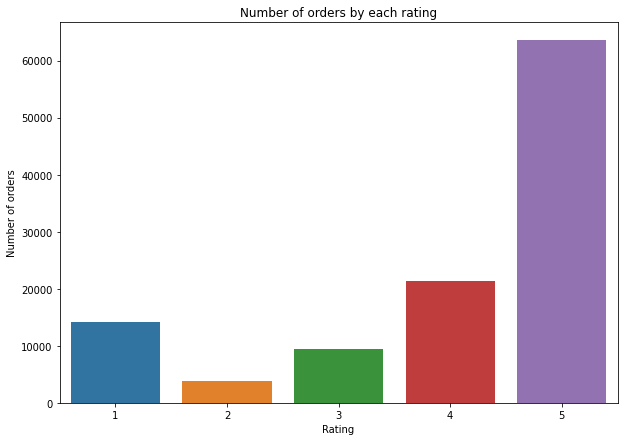

In [ ]:
plt.figure(figsize = (10,7))
sns.barplot(data = review_product.groupby('review_score').count()['order_id'].reset_index(), x = 'review_score', y = 'order_id')
plt.title('Number of orders by each rating')
plt.xlabel('Rating')
plt.ylabel('Number of orders');

**Distribution of Ratings by number of orders**

* We can observe here that highest number of orders have a "5*" rating which shows ao good customer satisfaction rate.
* Next highest number of orders have a "4*" rating 
* But, if we observe closely number of orders with a "1*" rating is higher than "2*" or "3*" ratings. 
* This denotes some customers are dissatisfied with the experience. Let's find out why.

In [ ]:
#Average Rating of all orders
average = review_product['review_score'].mean()
print(average)

4.032472502046773


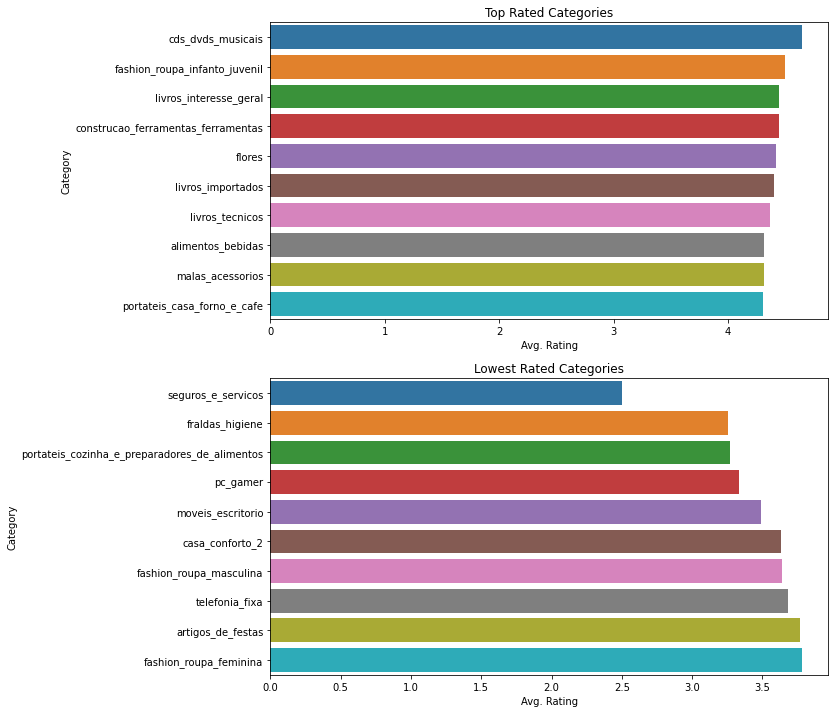

In [ ]:
#Deep dive into ratings - highest and lowest rated product categories for more detailed insights 
avg_rating = review_product.groupby('product_category_name').mean()['review_score'].reset_index()
top_rated_categories = avg_rating.sort_values('review_score', ascending = False).nlargest(10,'review_score')
lowest_rated_categories = avg_rating.sort_values('review_score', ascending = False).nsmallest(10,'review_score')

plt.figure(figsize = (10,12))

plt.subplot(211)
sns.barplot(data = top_rated_categories, x = 'review_score', y = 'product_category_name')
plt.title('Top Rated Categories')
plt.xlabel('Avg. Rating')
plt.ylabel('Category');


plt.subplot(212)
sns.barplot(data = lowest_rated_categories, x = 'review_score', y = 'product_category_name')
plt.title('Lowest Rated Categories')
plt.xlabel('Avg. Rating')
plt.ylabel('Category');

* Product Categories with Top Ratings are - cds_dvds, fashion, livros_interesse_geral 
* Product Categories with Lowest Ratings are - seguros_e_servicos, fraldas_higiene, pc_games

In [ ]:
#Analysis of reviews left by the customers based on their order experience 
review_order = pd.merge(order_data,reviews_data)
review_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99224 non-null  object
 1   customer_id                    99224 non-null  object
 2   order_status                   99224 non-null  object
 3   order_purchase_timestamp       99224 non-null  object
 4   order_approved_at              99068 non-null  object
 5   order_delivered_carrier_date   97468 non-null  object
 6   order_delivered_customer_date  96359 non-null  object
 7   order_estimated_delivery_date  99224 non-null  object
 8   review_id                      99224 non-null  object
 9   review_score                   99224 non-null  int64 
 10  review_comment_title           11568 non-null  object
 11  review_comment_message         40977 non-null  object
 12  review_creation_date           99224 non-null  object
 13  r

In [ ]:
review_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99219,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,e262b3f92d1ce917aa412a9406cf61a6,5,NaN,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08
99220,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
99221,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
99222,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


In [ ]:
review_order['review_length'] = review_order['review_comment_message'].str.len()
review_order[['review_score', 'review_length', 'review_comment_message']]

,review_score,review_length,review_comment_message
0,4,170.0,"Não testei o produto ainda, mas ele veio corre..."
1,4,20.0,Muito bom o produto.
2,5,NaN,NaN
3,5,105.0,O produto foi exatamente o que eu esperava e e...
4,5,NaN,NaN
...,...,...,...
99219,5,NaN,NaN
99220,4,44.0,So uma peça que veio rachado mas tudo bem rs
99221,5,28.0,Foi entregue antes do prazo.
99222,2,53.0,Foi entregue somente 1. Quero saber do outro p...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Review Rate'), Text(0.5, 0, 'Rating')]

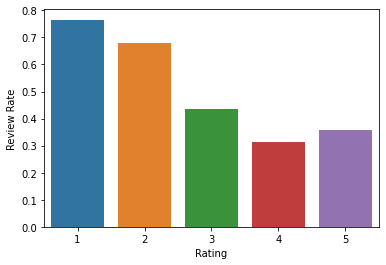

In [ ]:
#Review comments compared to the rating of the order 
def rate(df):
    return df['review_length'].count() / len(df)

review_rate = review_order.groupby('review_score').apply(rate)
sns.barplot(
    review_rate.index,
    review_rate.values,
).set(xlabel='Rating', ylabel='Review Rate')

# This is an interesting piece of insight generated from the data.
**We can obtain a review_rate based on each of the different rating options and try to find out
which customers are leaving a review and which of them aren't and try to find the reason behind this.**

* We can notice the review_rate is quite high for the "1*" ratings, which means that the customers  who gave a detailed review message were quite upset with the experience.

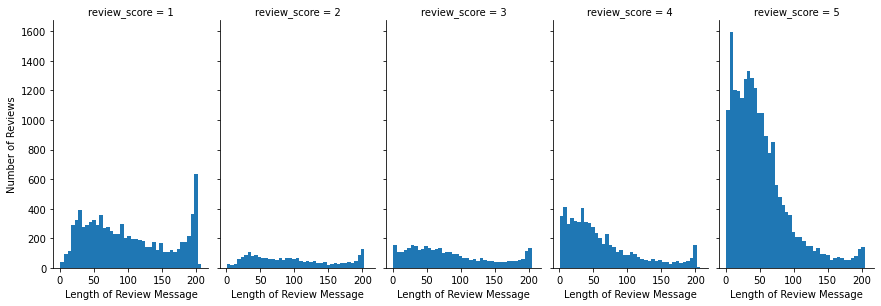

In [ ]:
#Analysis of Review messages by rating
g = sns.FacetGrid(data=review_order, col='review_score')
g.map(plt.hist, 'review_length', bins=40)
g.set_xlabels('Length of Review Message')
g.set_ylabels('Number of Reviews')
plt.gcf().set_size_inches(12, 5)

**This analysis proves our previous insight**

Here we have generated the lengths of review messages for each rating score

* If we observe the "1*" rating chart, we can see that the length of message is quite high (200+ chars) for a large number of reviews 
* Whereas on the contrasting side, if we observe the "5*" rating chart, we can see that the message length is very small (0-50 chars)

**Conclusion - Customers who leave a lower rating tend to leave a detailed review message to show their dissatisfaction or explain the issues which they faced.**

In [ ]:
#Analysis of Rating by Order status
review_order.groupby('order_status')['order_status'].count()

order_status
approved           2
canceled         609
created            3
delivered      96361
invoiced         313
processing       296
shipped         1043
unavailable      597
Name: order_status, dtype: int64

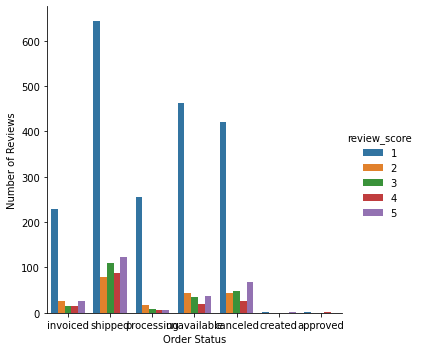

In [ ]:
#Deep-dive into order statuses which are not delivered and their rating trend
ax = sns.catplot(
    x='order_status',
    kind='count',
    hue='review_score',
    data=review_order[review_order['order_status'] != 'delivered'],
).set(xlabel='Order Status', ylabel='Number of Reviews');

**This chart only focuses on the orders whose status is anything but "delivered"**

We can notice here that "1*" ratings are quite common with customers who order was not delivered for some reason.

In [ ]:
order_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
#Converting columns to datetime
order_data['order_purchase_timestamp'] = pd.to_datetime(order_data['order_purchase_timestamp'], format='%Y/%m/%d %H:%M:%S')
order_data['order_delivered_customer_date'] = pd.to_datetime(order_data['order_delivered_customer_date'], format='%Y/%m/%d %H:%M:%S')

In [ ]:
#Delivery Timeline Analysis
#Average number of days for order fulfillment
order_data['TTD']=(order_data['order_delivered_customer_date']-order_data['order_purchase_timestamp']).dt.days
print("Average days taken to deliver the order {}".format(np.round(order_data['TTD'].mean(),0)))

#Average days taken for delivery from the time order was placed.

Average days taken to deliver the order 12.0


In [ ]:
order_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,TTD
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,8.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,22.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,24.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,17.0


(0.0, 100.0)

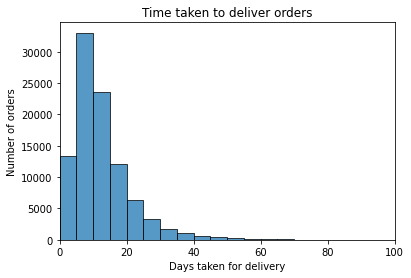

In [ ]:
#Analysis of individual orders and TTD
delivery=order_data[['order_id','TTD']].drop_duplicates(keep=False)
ax = sns.histplot(data=delivery[['order_id','TTD']], x='TTD', binwidth=5)
ax.set(title='Time taken to deliver orders', ylabel='Number of orders', xlabel='Days taken for delivery')
ax.set_xlim(0,100)

**The distribution of delivery times vs. number of orders is shown above.**

In [ ]:
customers_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
delivery_by_state = pd.merge(order_data,customers_data)
delivery_by_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
 8   TTD                            96476 non-null  float64       
 9   customer_unique_id             99441 non-null  object        
 10  customer_zip_code_prefix       99441 non-null  int64         
 11  customer_city  

In [ ]:
delivery_by_state

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,TTD,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,13.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,8.0,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,22.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,24.0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,17.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [ ]:
delivery_by_state['order_purchase_timestamp'] = pd.to_datetime(delivery_by_state['order_purchase_timestamp'], format='%Y/%m/%d %H:%M:%S')
delivery_by_state['order_delivered_customer_date'] = pd.to_datetime(delivery_by_state['order_delivered_customer_date'], format='%Y/%m/%d %H:%M:%S')

In [ ]:
delivery_by_state['TTD']=(delivery_by_state['order_delivered_customer_date']-delivery_by_state['order_purchase_timestamp']).dt.days

In [ ]:
delivery_by_state

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,TTD,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,13.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,8.0,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,22.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,24.0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,17.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


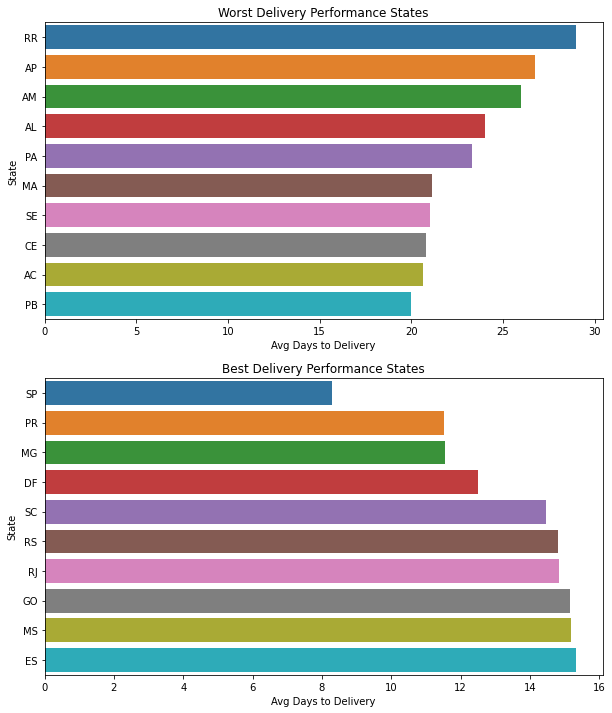

In [ ]:
#Analysis of delivery performance by State


dbs = delivery_by_state.groupby('customer_state').mean()['TTD'].reset_index()
slowest = dbs.sort_values('TTD', ascending = False).nlargest(10,'TTD')
fastest = dbs.sort_values('TTD', ascending = False).nsmallest(10,'TTD')

plt.figure(figsize = (10,12))

plt.subplot(211)
sns.barplot(data = slowest, x = 'TTD', y = 'customer_state')
plt.title('Worst Delivery Performance States')
plt.xlabel('Avg Days to Delivery')
plt.ylabel('State');
plt.subplot(212)
sns.barplot(data = fastest, x = 'TTD', y = 'customer_state')
plt.title('Best Delivery Performance States')
plt.xlabel('Avg Days to Delivery')
plt.ylabel('State');

# With this analysis we are interested in finding out more about the statewise delivery times 
**Let's observe which states have the worst delivery performance and best delivery performances.**

1. Worst Delivery performance is seen in RR, AP, AM, AL and PA 
* Time taken to deliver in these states on average is between 24 to 30 days

2. Best Delivery performance is seen in SP, PR, MG, DF and SC 
* Time taken to deliver in these states on average is between 8 to 14 days

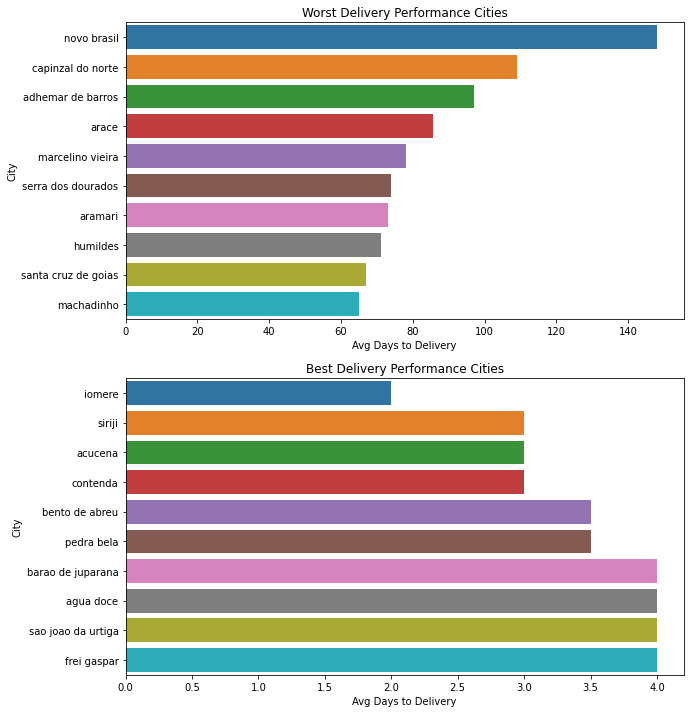

In [ ]:
#Analysis of delivery performance by City


dbs = delivery_by_state.groupby('customer_city').mean()['TTD'].reset_index()
slowest = dbs.sort_values('TTD', ascending = False).nlargest(10,'TTD')
fastest = dbs.sort_values('TTD', ascending = False).nsmallest(10,'TTD')

plt.figure(figsize = (10,12))

plt.subplot(211)
sns.barplot(data = slowest, x = 'TTD', y = 'customer_city')
plt.title('Worst Delivery Performance Cities')
plt.xlabel('Avg Days to Delivery')
plt.ylabel('City');

plt.subplot(212)
sns.barplot(data = fastest, x = 'TTD', y = 'customer_city')
plt.title('Best Delivery Performance Cities')
plt.xlabel('Avg Days to Delivery')
plt.ylabel('City');

# With this analysis we are interested in finding out more about the citywise delivery times 
**Let's observe which cities have the worst delivery performance and best delivery performances.**

1. Worst Delivery performance is seen in novo brasil, capinzal, adhemar, arace and marcelino
* Time taken to deliver in these states on average is between 80 to 150 days

2. Best Delivery performance is seen in iomere, siriji, acucena, contenda, bento 
* Time taken to deliver in these states on average is between 2 to 4 days

***The E-commerce company should look into alternative shipping methods or new shipping partners to reduce the delivery times in these problematic regions. Delivery times upwards of 80 days is unacceptable and it should be improved.***

In [ ]:
#Seller Analysis
seller_product = pd.merge(product_order, sellers_data, on="seller_id")
seller_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    112650 non-null  object 
 1   order_item_id               112650 non-null  int64  
 2   product_id                  112650 non-null  object 
 3   seller_id                   112650 non-null  object 
 4   shipping_limit_date         112650 non-null  object 
 5   price                       112650 non-null  float64
 6   freight_value               112650 non-null  float64
 7   product_category_name       111047 non-null  object 
 8   product_name_lenght         111047 non-null  float64
 9   product_description_lenght  111047 non-null  float64
 10  product_photos_qty          111047 non-null  float64
 11  product_weight_g            112632 non-null  float64
 12  product_length_cm           112632 non-null  float64
 13  product_height

In [ ]:
seller_product

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,prod_id,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,83c13e61,27277,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,83c13e61,27277,volta redonda,SP
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,83c13e61,27277,volta redonda,SP
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,83c13e61,27277,volta redonda,SP
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,83c13e61,27277,volta redonda,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fdaf98feac227eb978d8f33f36e0231d,1,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,2017-04-27 05:10:28,119.9,16.14,moveis_decoracao,44.0,533.0,2.0,1000.0,69.0,11.0,11.0,3005e5e9,80220,curitiba,PR
112646,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.0,16.21,eletronicos,32.0,1306.0,3.0,500.0,17.0,9.0,25.0,9533797a,82620,curitiba,PR
112647,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,cb6ed62e,86026,londrina,PR
112648,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.9,14.44,bebidas,28.0,242.0,1.0,2000.0,19.0,38.0,19.0,3fa2653c,3124,sao paulo,SP


In [ ]:
#Shorten length of seller_id
seller_product['seller_id_shorten']=seller_product['seller_id'].str[-6:]

Text(0.5, 1.0, 'Top 10 Seller')

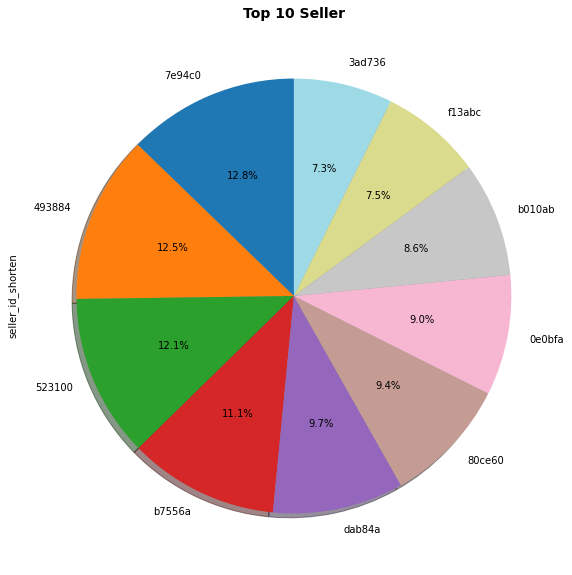

In [ ]:
plt.figure(figsize=(20,10))
seller_product['seller_id_shorten'].value_counts()[:10].plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, cmap='tab20')
plt.title("Top 10 Seller",size=14, weight='bold')

**This piechart shows the Top 10 Sellers on the platform.**

Text(0.5, 1.0, 'Top 10 Seller States')

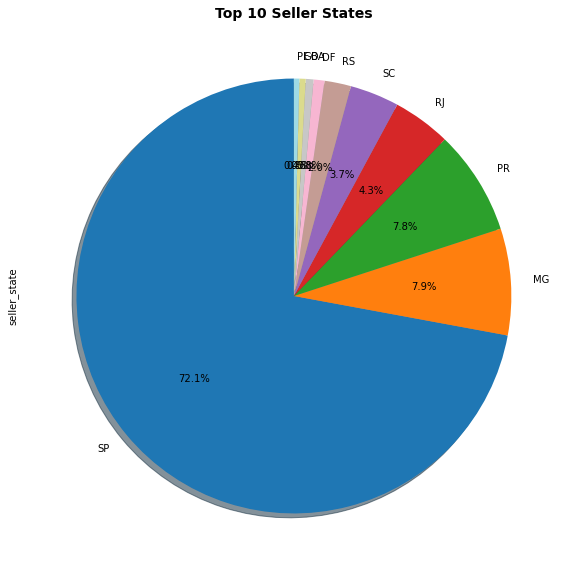

In [ ]:
plt.figure(figsize=(20,10))
seller_product['seller_state'].value_counts()[:10].plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, cmap='tab20')
plt.title("Top 10 Seller States",size=14, weight='bold')

**This piechart shows the Statewise Seller distribution on the platform.
We can see that a very large chunk of sellers operate out of the Sao Paolo (SP) state. (72%)**

Text(0.5, 1.0, 'Top 10 Seller Cities')

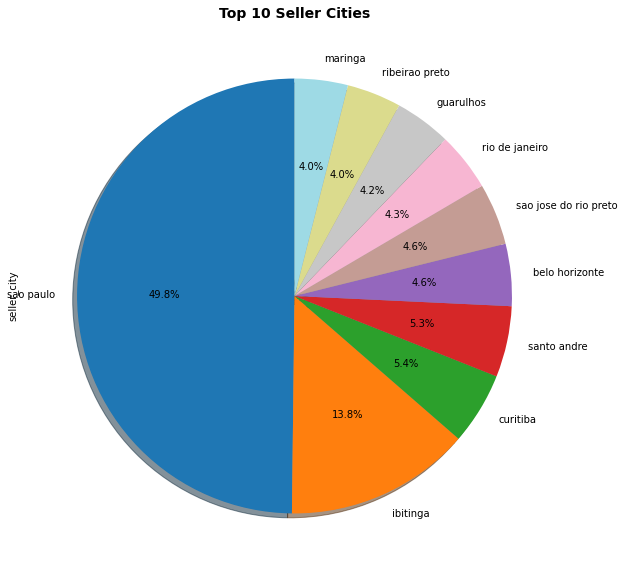

In [ ]:
plt.figure(figsize=(20,10))
seller_product['seller_city'].value_counts()[:10].plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, cmap='tab20')
plt.title("Top 10 Seller Cities",size=14, weight='bold')

**This piechart shows the Citywise Seller distribution on the platform. We can see that a very large chunk of sellers operate out of the Sao Paolo city (50%) followed by Ibitinga (14%).**

In [ ]:
#Financial Analysis 
order_payment = pd.merge(order_data,payment_data,how="left",on=['order_id','order_id'])
order_payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103887 non-null  object        
 1   customer_id                    103887 non-null  object        
 2   order_status                   103887 non-null  object        
 3   order_purchase_timestamp       103887 non-null  datetime64[ns]
 4   order_approved_at              103712 non-null  object        
 5   order_delivered_carrier_date   101999 non-null  object        
 6   order_delivered_customer_date  100755 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103887 non-null  object        
 8   TTD                            100755 non-null  float64       
 9   payment_sequential             103886 non-null  float64       
 10  payment_type                   103886 non-null  object        
 11  

In [ ]:
order_payment

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,TTD,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,13.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,8.0,1.0,credit_card,3.0,85.08
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,22.0,1.0,credit_card,3.0,195.00
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,24.0,1.0,credit_card,5.0,271.01
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,17.0,1.0,credit_card,4.0,441.16


In [ ]:
print("Average Order Value:",order_payment['payment_value'].mean())
#Average order value based on orders information.

Average Order Value: 154.10038041699553


In [ ]:
payment_state = pd.merge(delivery_by_state,payment_data,how="left",on=['order_id','order_id'])
payment_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103887 non-null  object        
 1   customer_id                    103887 non-null  object        
 2   order_status                   103887 non-null  object        
 3   order_purchase_timestamp       103887 non-null  datetime64[ns]
 4   order_approved_at              103712 non-null  object        
 5   order_delivered_carrier_date   101999 non-null  object        
 6   order_delivered_customer_date  100755 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103887 non-null  object        
 8   TTD                            100755 non-null  float64       
 9   customer_unique_id             103887 non-null  object        
 10  customer_zip_code_prefix       103887 non-null  int64         
 11  

In [ ]:
payment_state

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,TTD,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,13.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,8.0,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1.0,credit_card,3.0,85.08
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,22.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,credit_card,3.0,195.00
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,24.0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,credit_card,5.0,271.01
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,17.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,credit_card,4.0,441.16


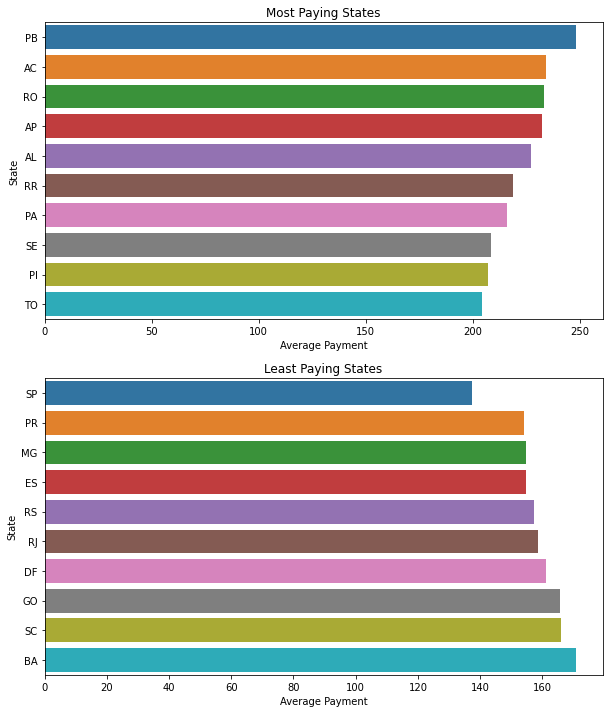

In [ ]:
#Analysis of Financials by State


fbs = payment_state.groupby('customer_state').mean()['payment_value'].reset_index()
most_paying_states = fbs.sort_values('payment_value', ascending = False).nlargest(10,'payment_value')
least_paying_states = fbs.sort_values('payment_value', ascending = False).nsmallest(10,'payment_value')

plt.figure(figsize = (10,12))

plt.subplot(211)
sns.barplot(data = most_paying_states, x = 'payment_value', y = 'customer_state')
plt.title('Most Paying States')
plt.xlabel('Average Payment')
plt.ylabel('State');

plt.subplot(212)
sns.barplot(data = least_paying_states, x = 'payment_value', y = 'customer_state')
plt.title('Least Paying States')
plt.xlabel('Average Payment')
plt.ylabel('State');

# This analysis focuses on the Statewise distribution of paying capacity based on order information

1. The top States which have the highest order values are - PB, AC, RO, AP, AL 
* The range of order value for these states is - 225 to 250 Reals.

2. The top States which have the lowest order values are - SP, PR, MG, ES, RS 
* The range of order value for these states is - 130 to 150 Reals.

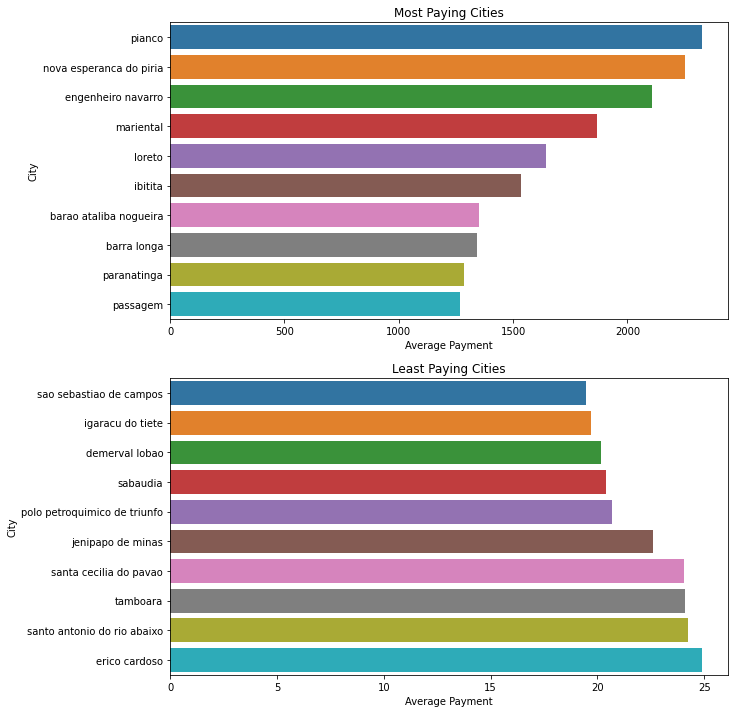

In [ ]:
#Analysis of Financials by City


fbs = payment_state.groupby('customer_city').mean()['payment_value'].reset_index()
most_paying_states = fbs.sort_values('payment_value', ascending = False).nlargest(10,'payment_value')
least_paying_states = fbs.sort_values('payment_value', ascending = False).nsmallest(10,'payment_value')

plt.figure(figsize = (10,12))

plt.subplot(211)
sns.barplot(data = most_paying_states, x = 'payment_value', y = 'customer_city')
plt.title('Most Paying Cities')
plt.xlabel('Average Payment')
plt.ylabel('City');

plt.subplot(212)
sns.barplot(data = least_paying_states, x = 'payment_value', y = 'customer_city')
plt.title('Least Paying Cities')
plt.xlabel('Average Payment')
plt.ylabel('City');

# This analysis focuses on the Citywise distribution of paying capacity based on order information

1. The top Cities which have the highest order values are - pianco, nova, navarro, mariental, loreto 
* The range of order value for these cities is - 1600 to 2400 Reals.

2. The top Cities which have the lowest order values are - sebastio, igaracu, demerval, sabaudia, polo
* The range of order value for these cities is - 20 to 25 Reals.